In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = r"..\Datasets\WDI_Data_Before cleaning.csv"

df = pd.read_csv(file_path)

print("Missing values per column (before cleaning):")
print(df.isna().sum())

Missing values per column (before cleaning):
Country Name     3
Country Code     5
Series Name      5
Series Code      5
2008 [YR2008]    5
2009 [YR2009]    5
2010 [YR2010]    5
2011 [YR2011]    5
2012 [YR2012]    5
2013 [YR2013]    5
2014 [YR2014]    5
2015 [YR2015]    5
2016 [YR2016]    5
2017 [YR2017]    5
2018 [YR2018]    5
2019 [YR2019]    5
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
dtype: int64


In [5]:
print(df.head())

  Country Name Country Code  \
0        Kenya          KEN   
1        Kenya          KEN   
2        Kenya          KEN   
3        Kenya          KEN   
4        Kenya          KEN   

                                         Series Name     Series Code  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1  Agriculture, forestry, and fishing, value adde...  NV.AGR.TOTL.ZS   
2  Annual freshwater withdrawals, total (% of int...  ER.H2O.FWTL.ZS   
3  Births attended by skilled health staff (% of ...  SH.STA.BRTC.ZS   
4  Contraceptive prevalence, any method (% of mar...  SP.DYN.CONU.ZS   

      2008 [YR2008]     2009 [YR2009]     2010 [YR2010]     2011 [YR2011]  \
0           112.227           110.195           108.691           104.615   
1  22.1963401579826  16.2549814662286  17.5677598863696  18.8947112249953   
2  14.3064182193237  14.9261559695652  15.5458937198068  15.5478260869565   
3                ..              43.8                ..                .

In [6]:
df.columns = [
    'CountryName',
    'CountryCode',
    'SeriesName',
    'SeriesCode',
    '2008', '2009', '2010', '2011',
    '2012', '2013', '2014', '2015',
    '2016', '2017', '2018', '2019',
    '2020', '2021', '2022', '2023'
]

df = df.replace('..', pd.NA)

year_cols = [str(y) for y in range(2008, 2024)]
for col in year_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_long = df.melt(
    id_vars=['CountryName', 'CountryCode', 'SeriesName', 'SeriesCode'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)


In [7]:
df_long.dropna(subset=['Value'], inplace=True)
df_long.drop_duplicates(inplace=True)
df_long['SeriesName'] = df_long['SeriesName'].str.strip().str.title()


In [8]:
print(df_long.columns)


Index(['CountryName', 'CountryCode', 'SeriesName', 'SeriesCode', 'Year',
       'Value'],
      dtype='object')


In [9]:
df_long.drop(columns=['SeriesCode'], inplace=True)
df_long.drop(columns=['CountryCode'], inplace=True)

In [10]:
print(df_long.head())


  CountryName                                         SeriesName  Year  \
0       Kenya  Adolescent Fertility Rate (Births Per 1,000 Wo...  2008   
1       Kenya  Agriculture, Forestry, And Fishing, Value Adde...  2008   
2       Kenya  Annual Freshwater Withdrawals, Total (% Of Int...  2008   
6       Kenya        Electric Power Consumption (Kwh Per Capita)  2008   
7       Kenya       Energy Use (Kg Of Oil Equivalent Per Capita)  2008   

        Value  
0  112.227000  
1   22.196340  
2   14.306418  
6  140.946552  
7  450.165383  


In [11]:
print("Missing values per column (before cleaning):")
print(df_long.isna().sum())

Missing values per column (before cleaning):
CountryName    0
SeriesName     0
Year           0
Value          0
dtype: int64


In [12]:
print(df_long.head())

  CountryName                                         SeriesName  Year  \
0       Kenya  Adolescent Fertility Rate (Births Per 1,000 Wo...  2008   
1       Kenya  Agriculture, Forestry, And Fishing, Value Adde...  2008   
2       Kenya  Annual Freshwater Withdrawals, Total (% Of Int...  2008   
6       Kenya        Electric Power Consumption (Kwh Per Capita)  2008   
7       Kenya       Energy Use (Kg Of Oil Equivalent Per Capita)  2008   

        Value  
0  112.227000  
1   22.196340  
2   14.306418  
6  140.946552  
7  450.165383  


In [13]:


year_cols = [col for col in df_long.columns if col.isdigit()]



In [14]:
print(df_long['SeriesName'].unique())

['Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)'
 'Agriculture, Forestry, And Fishing, Value Added (% Of Gdp)'
 'Annual Freshwater Withdrawals, Total (% Of Internal Resources)'
 'Electric Power Consumption (Kwh Per Capita)'
 'Energy Use (Kg Of Oil Equivalent Per Capita)'
 'Exports Of Goods And Services (% Of Gdp)'
 'External Debt Stocks, Total (Dod, Current Us$)'
 'Fertility Rate, Total (Births Per Woman)'
 'Foreign Direct Investment, Net Inflows (Bop, Current Us$)'
 'Forest Area (Sq. Km)' 'Gdp (Current Us$)' 'Gdp Growth (Annual %)'
 'Gni Per Capita, Atlas Method (Current Us$)'
 'Gni Per Capita, Ppp (Current International $)'
 'Gni, Atlas Method (Current Us$)' 'Gni, Ppp (Current International $)'
 'Gross Capital Formation (% Of Gdp)'
 'High-Technology Exports (% Of Manufactured Exports)'
 'Immunization, Measles (% Of Children Ages 12-23 Months)'
 'Imports Of Goods And Services (% Of Gdp)'
 'Industry (Including Construction), Value Added (% Of Gdp)'
 'Inflation, Gdp Defl

In [15]:
print(df_long['CountryName'].unique())

['Kenya' 'Ethiopia' 'Uganda' 'Nigeria' 'Ghana' 'Botswana' 'Rwanda' 'Chad']


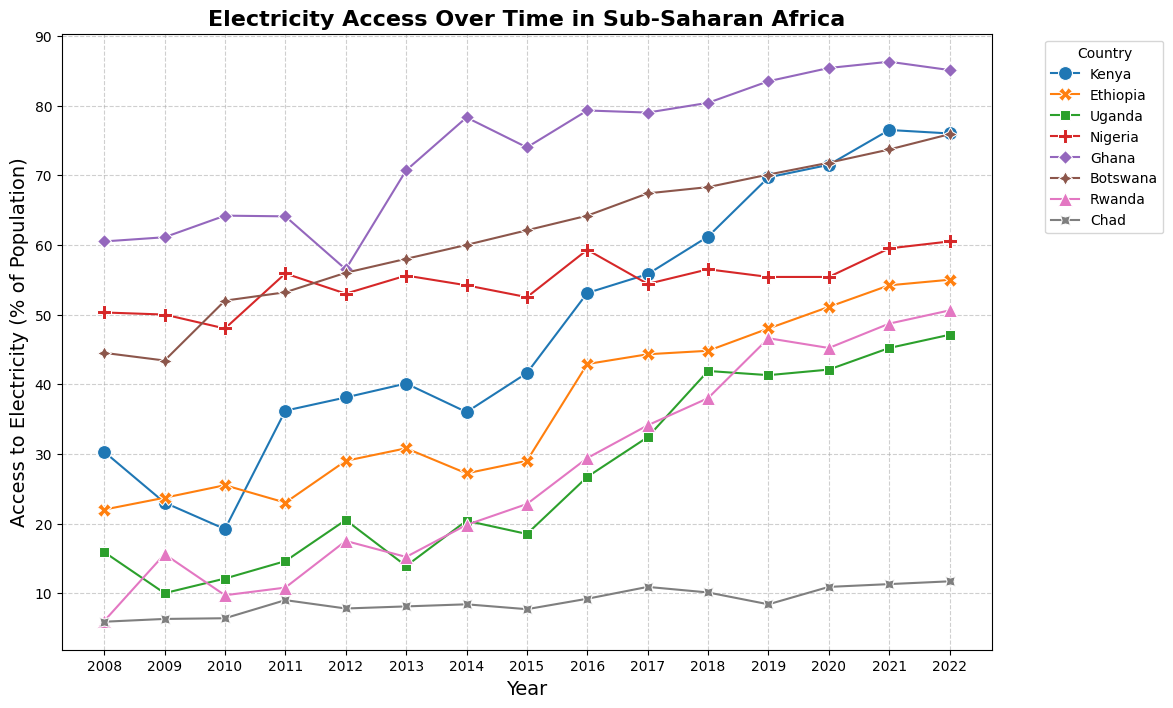

In [16]:
sub_saharan_africa_countries = ['Kenya', 'Ethiopia', 'Uganda', 'Nigeria', 'Ghana', 'Botswana', 'Rwanda', 'Chad']
df_electricity = df_long[(df_long['SeriesName'] == 'Access To Electricity (% Of Population)') &
                         (df_long['CountryName'].isin(sub_saharan_africa_countries))]

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_electricity,
    x='Year',
    y='Value',
    hue='CountryName',
    style='CountryName',
    markers=True,
    dashes=False,
    linewidth=1.5,
    markersize=10,
    palette='tab10'
)
plt.title('Electricity Access Over Time in Sub-Saharan Africa', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Access to Electricity (% of Population)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for better readability
plt.show()

In [17]:
df_consumption = df_long[(df_long['SeriesName'] == 'Households And Npishs Final Consumption Expenditure Per Capita (Constant 2015 Us$)') &
                         (df_long['CountryName'].isin(sub_saharan_africa_countries))]

df_electricity = df_long[(df_long['SeriesName'] == 'Electric Power Consumption (Kwh Per Capita)') &
                         (df_long['CountryName'].isin(sub_saharan_africa_countries))]

df_merged = pd.merge(df_consumption, df_electricity, on=['CountryName', 'Year'], suffixes=('_consumption', '_electricity'))

print(df_merged.head())

  CountryName                             SeriesName_consumption  Year  \
0       Kenya  Households And Npishs Final Consumption Expend...  2008   
1       Ghana  Households And Npishs Final Consumption Expend...  2008   
2    Botswana  Households And Npishs Final Consumption Expend...  2008   
3       Kenya  Households And Npishs Final Consumption Expend...  2009   
4       Ghana  Households And Npishs Final Consumption Expend...  2009   

   Value_consumption                       SeriesName_electricity  \
0         959.383897  Electric Power Consumption (Kwh Per Capita)   
1         953.362640  Electric Power Consumption (Kwh Per Capita)   
2        2170.437346  Electric Power Consumption (Kwh Per Capita)   
3         973.549859  Electric Power Consumption (Kwh Per Capita)   
4         949.855045  Electric Power Consumption (Kwh Per Capita)   

   Value_electricity  
0         140.946552  
1         253.897473  
2        1515.407929  
3         141.503512  
4         252.869121  


<ipython-input-18-173980de5381>:9: UserWarning: The palette list has more values (20) than needed (4), which may not be intended.
  sns.scatterplot(


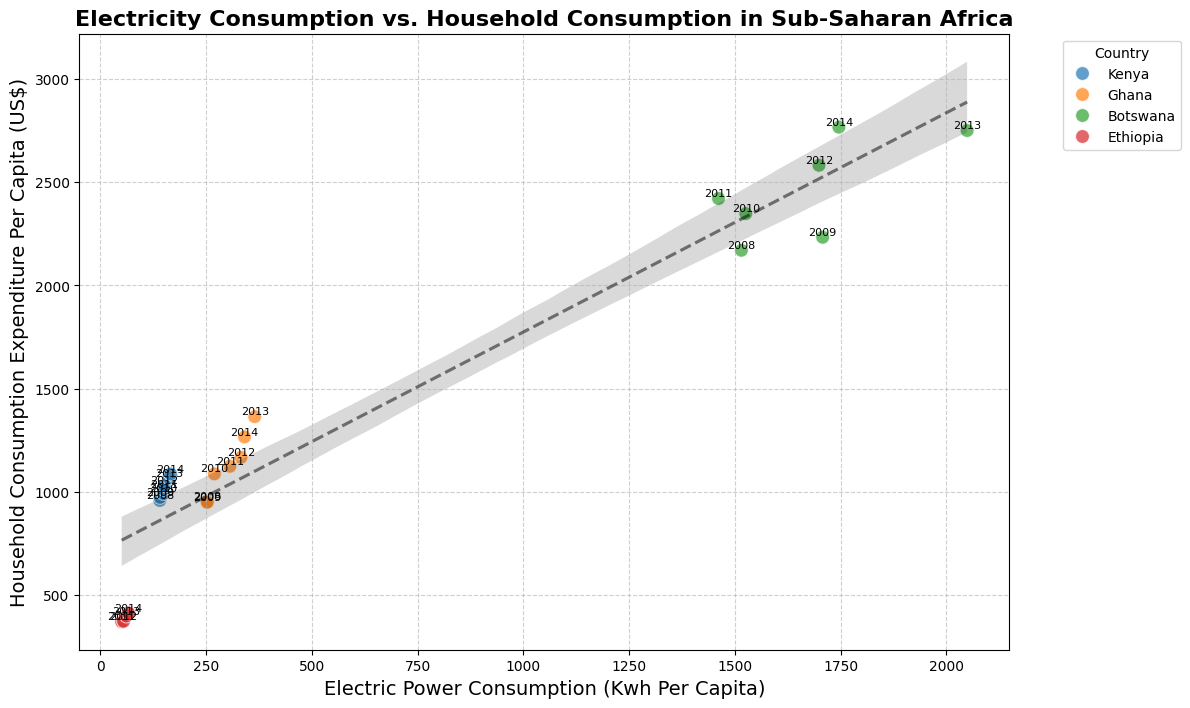

In [18]:
custom_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_merged,
    x='Value_electricity',
    y='Value_consumption',
    hue='CountryName',
    palette=custom_palette,
    s=100,
    alpha=0.7
)

for i, row in df_merged.iterrows():
    plt.text(
        row['Value_electricity'],
        row['Value_consumption'],
        str(int(row['Year'])),
        fontsize=8,
        ha='center',
        va='bottom'
    )

sns.regplot(
    data=df_merged,
    x='Value_electricity',
    y='Value_consumption',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

plt.title('Electricity Consumption vs. Household Consumption in Sub-Saharan Africa', fontsize=16, fontweight='bold')
plt.xlabel('Electric Power Consumption (Kwh Per Capita)', fontsize=14)
plt.ylabel('Household Consumption Expenditure Per Capita (US$)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

  CountryName            SeriesName_inequality  Year  Value_inequality  \
0      Uganda  Income Share Held By Lowest 20%  2009               5.9   
1    Botswana  Income Share Held By Lowest 20%  2009               2.8   
2    Ethiopia  Income Share Held By Lowest 20%  2010               8.0   
3     Nigeria  Income Share Held By Lowest 20%  2010               7.1   
4      Rwanda  Income Share Held By Lowest 20%  2010               5.6   

                    SeriesName_electricity  Value_electricity  
0  Access To Electricity (% Of Population)               10.0  
1  Access To Electricity (% Of Population)               43.4  
2  Access To Electricity (% Of Population)               25.5  
3  Access To Electricity (% Of Population)               48.0  
4  Access To Electricity (% Of Population)                9.7  


<ipython-input-19-864055bb9ff4>:19: UserWarning: The palette list has more values (20) than needed (8), which may not be intended.
  sns.scatterplot(


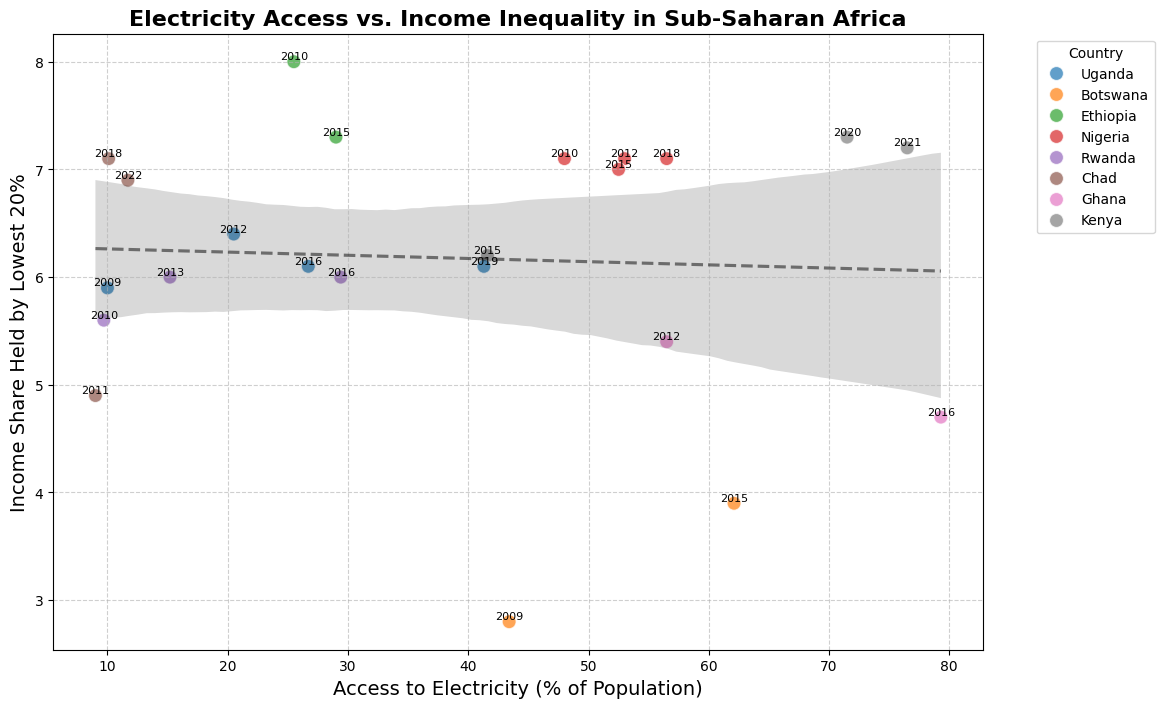

In [19]:
df_inequality = df_long[(df_long['SeriesName'] == 'Income Share Held By Lowest 20%') &
                        (df_long['CountryName'].isin(sub_saharan_africa_countries))]

df_electricity = df_long[(df_long['SeriesName'] == 'Access To Electricity (% Of Population)') &
                         (df_long['CountryName'].isin(sub_saharan_africa_countries))]

df_merged = pd.merge(df_inequality, df_electricity, on=['CountryName', 'Year'], suffixes=('_inequality', '_electricity'))

print(df_merged.head())

custom_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
    '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5'
]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_merged,
    x='Value_electricity',
    y='Value_inequality',
    hue='CountryName',
    palette=custom_palette,
    s=100,
    alpha=0.7
)

# Add year labels to each point
for i, row in df_merged.iterrows():
    plt.text(
        row['Value_electricity'],
        row['Value_inequality'],
        str(int(row['Year'])),
        fontsize=8,
        ha='center',
        va='bottom'
    )

sns.regplot(
    data=df_merged,
    x='Value_electricity',
    y='Value_inequality',
    scatter=False,
    color='black',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

plt.title('Electricity Access vs. Income Inequality in Sub-Saharan Africa', fontsize=16, fontweight='bold')
plt.xlabel('Access to Electricity (% of Population)', fontsize=14)
plt.ylabel('Income Share Held by Lowest 20%', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [20]:
print(df_merged.columns)

Index(['CountryName', 'SeriesName_inequality', 'Year', 'Value_inequality',
       'SeriesName_electricity', 'Value_electricity'],
      dtype='object')
